In [1]:
import numpy as np 
import pandas as pd  
import cv2
import matplotlib.pyplot as plt 
import os
print(os.listdir("../Image Classification with CNN for Malaria Data/cell_images"))
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

['Parasitized', 'Uninfected']


In [2]:
train_data=os.listdir("../Image Classification with CNN for Malaria Data/cell_images/") 


parasitized_data = os.listdir("../Image Classification with CNN for Malaria Data/cell_images/Parasitized/") #Parazitli örnek
 

uninfected_data = os.listdir("../Image Classification with CNN for Malaria Data/cell_images/Uninfected/")#Parazitsiz temiz örnek



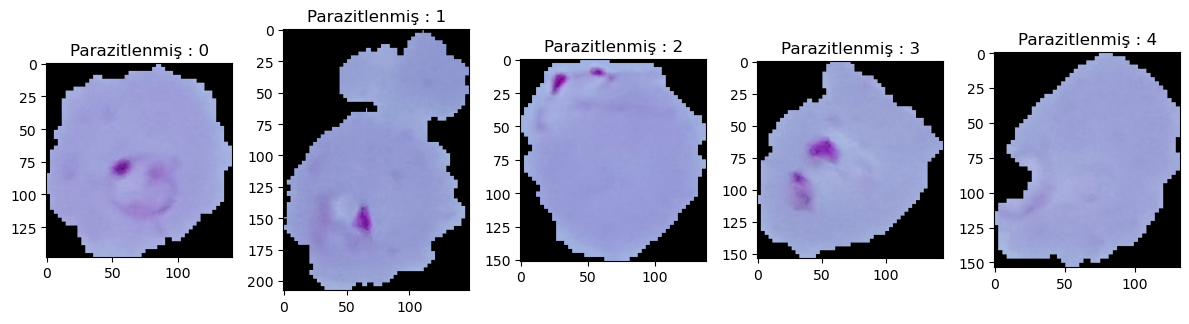

In [3]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("../Image Classification with CNN for Malaria Data/cell_images/Parasitized" + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('Parazitlenmiş : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

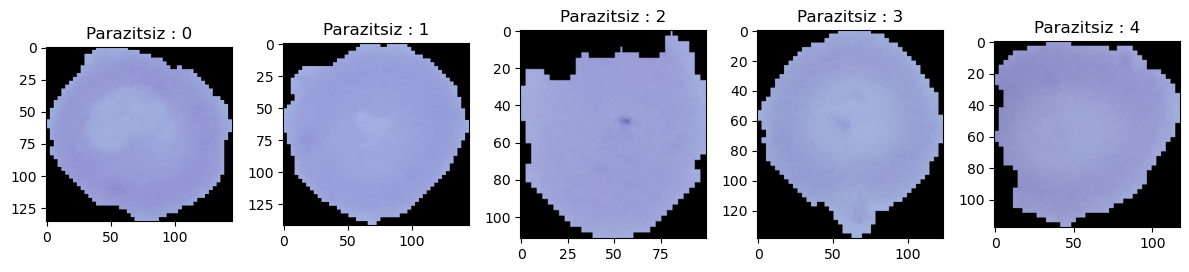

In [4]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("../Image Classification with CNN for Malaria Data/cell_images/Uninfected" + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('Parazitsiz : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

In [5]:
import pathlib
import tensorflow as tf
from tensorflow.keras import layers

In [6]:
data_dir = pathlib.Path("../Image Classification with CNN for Malaria Data/cell_images/")

In [7]:
batch_size = 128
img_height = 150
img_width = 150

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [10]:
gruplama = train_ds.class_names
print(gruplama)

['Parasitized', 'Uninfected']


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)   

In [12]:
num_classes = len(gruplama)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 32)        0

In [14]:
tf.keras.backend.clear_session()

In [15]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs, verbose=1)

Epoch 1/10
173/173 [==============================] - 1456s 5s/step - loss: 0.6455 - accuracy: 0.6571 - val_loss: 0.4358 - val_accuracy: 0.8224
Epoch 2/10
173/173 [==============================] - 954s 6s/step - loss: 0.2616 - accuracy: 0.9036 - val_loss: 0.1946 - val_accuracy: 0.9367
Epoch 3/10
173/173 [==============================] - 1016s 6s/step - loss: 0.1833 - accuracy: 0.9374 - val_loss: 0.1716 - val_accuracy: 0.9443
Epoch 4/10
173/173 [==============================] - 937s 5s/step - loss: 0.1700 - accuracy: 0.9426 - val_loss: 0.1751 - val_accuracy: 0.9483
Epoch 5/10
173/173 [==============================] - 955s 6s/step - loss: 0.1517 - accuracy: 0.9507 - val_loss: 0.1543 - val_accuracy: 0.9517
Epoch 6/10
173/173 [==============================] - 943s 5s/step - loss: 0.1397 - accuracy: 0.9548 - val_loss: 0.1416 - val_accuracy: 0.9565
Epoch 7/10
173/173 [==============================] - 956s 6s/step - loss: 0.1236 - accuracy: 0.9579 - val_loss: 0.1413 - val_accuracy: 0.95

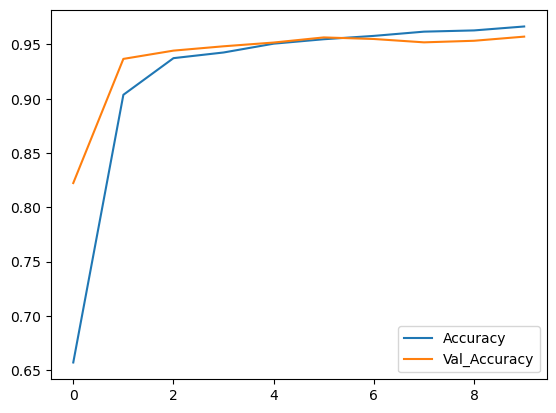

In [16]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend();

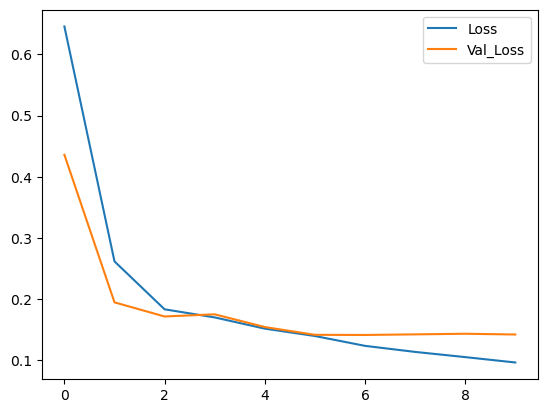

In [17]:
plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="Val_Loss")
plt.legend();